Validation Framework

In [181]:
import numpy
import pandas

In [ ]:
# download file from host
url='https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv'
#!curl -o dataset.csv $url


164863.01s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1440k  100 1440k    0     0   435k      0  0:00:03  0:00:03 --:--:--  436k


In [ ]:
df = pandas.read_csv("../../data/raw/dataset.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [184]:
print(df.columns)
df.columns = df.columns.str.lower().str.replace(" ", "_")

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')


In [185]:
# clean the data string of the fields
indexes = df.dtypes[df.dtypes == "object"].index
stringsCol = list(indexes)

# df['model'].str.lower().str.replace(" ", "_")

for col in stringsCol:
    df[col] = df[col].str.lower().str.replace(" ", "_")

df["make"]

0            bmw
1            bmw
2            bmw
3            bmw
4            bmw
          ...   
11909      acura
11910      acura
11911      acura
11912      acura
11913    lincoln
Name: make, Length: 11914, dtype: object

<Axes: xlabel='msrp', ylabel='Count'>

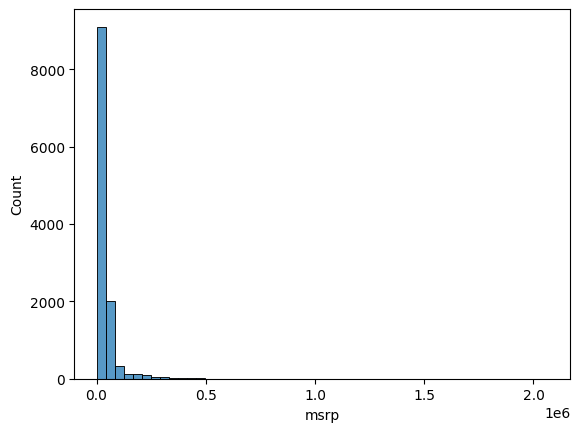

In [186]:
# clean the data
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.histplot(data=df.msrp, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

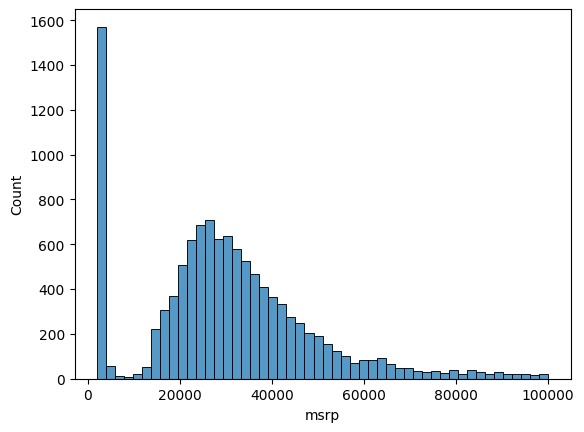

In [187]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

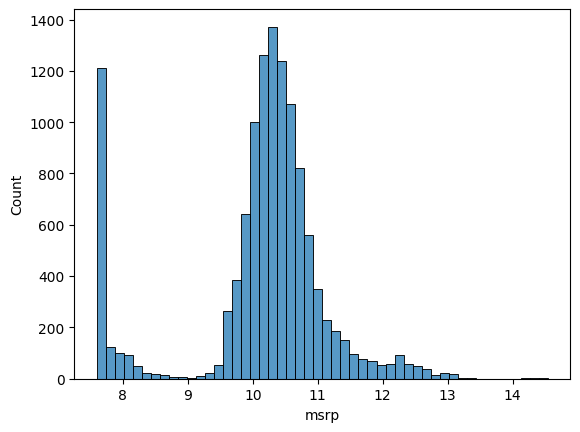

In [188]:
# clean the data from the tail by using log (Data analysis)
numpy.log1p([0, 1, 10, 100, 1000])
# Normal Distribution
price_logs = numpy.log1p(df.msrp)
sns.histplot(price_logs, bins=50)

In [189]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

df.isnull().sum()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [190]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print(n, n_train, n_val, n_test)
print(n_train + n_val + n_test)

11914 7150 2382 2382
11914


In [191]:
# shuffle the data
idx = numpy.arange(n)
numpy.random.seed(2)
numpy.random.shuffle(idx)

In [192]:
# print('test-->',df.iloc[idx[0:5]])

df_traing = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train : n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val :]]

print(df_traing)

              make        model  year                engine_fuel_type  \
2735     chevrolet       cobalt  2008                regular_unleaded   
6720        toyota       matrix  2012                regular_unleaded   
5878        subaru      impreza  2016                regular_unleaded   
11190   volkswagen      vanagon  1991                regular_unleaded   
4554          ford        f-150  2017        flex-fuel_(unleaded/e85)   
...            ...          ...   ...                             ...   
434            bmw     4_series  2015     premium_unleaded_(required)   
1902    volkswagen       beetle  2015  premium_unleaded_(recommended)   
9334           gmc  sierra_1500  2015        flex-fuel_(unleaded/e85)   
5284   rolls-royce        ghost  2014     premium_unleaded_(required)   
2420    volkswagen           cc  2017  premium_unleaded_(recommended)   

       engine_hp  engine_cylinders transmission_type      driven_wheels  \
2735       148.0               4.0            ma

In [193]:
y_train = numpy.log1p(df_traing.msrp.values)
y_val = numpy.log1p(df_val.msrp.values)
y_test = numpy.log1p(df_test.msrp.values)

In [194]:
del df_traing["msrp"]
del df_val["msrp"]
del df_test["msrp"]

Notes:
1. download and read the dataset
2. clean the columns names
3. clean the rows values
4. find the feature will work on it and find the normal distribution for it
5. shuffle the data
6. create the 3 groups of df (training,test,validation)
7. apply the log1p on the feature for the tree dataset

- **Linear Regression** (Training the model)
Normal Equation:
w = (XT.X)⁻1 . XT.y

In [195]:
# print(df.iloc[10])
# featureMatrix= [engine_hp, city_mpg, popularity]
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 83],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
]
X = numpy.array(X)
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]


def train_linear_regression(X, y):

    ones = numpy.ones(X.shape[0])
    X = numpy.column_stack([ones, X])
    #print(X)

    # GRAM MATRIX (x.T (transpose: switch columns to rows))
    XTX = X.T.dot(X)
    # print('\n',X.T)
    # Inverse GRAM MATRIX: (XT.X)-1
 
    XTX_inv = numpy.linalg.inv(XTX)

    # print("XTX.dot(XTX_inv): \n", XTX.dot(XTX_inv).round())
    w_full = XTX_inv.dot(X.T).dot(y)

    w0 = w_full[0]
    w = w_full[1:]
    return w0, w


print(train_linear_regression(X, y))

(np.float64(30009.252922766624), array([ -22.78396914, -257.69087426,   -2.30322797]))


w0: 7.927257388070062 w: [ 9.70589522e-03 -1.59103494e-01  1.43792133e-02  1.49441072e-02
 -9.06908672e-06]


<Axes: ylabel='Count'>

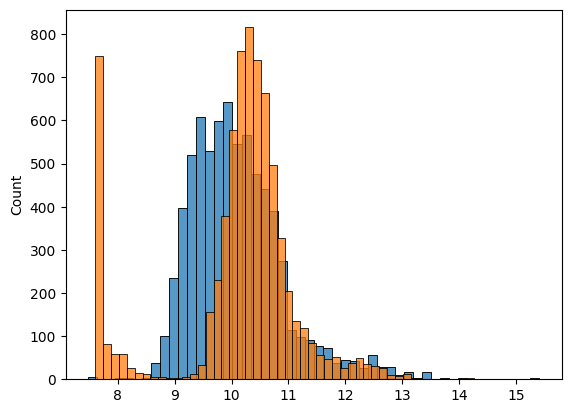

In [196]:
df_traing.columns
base = ["engine_hp", "engine_cylinders", "highway_mpg", "city_mpg", "popularity"]
X_train = df_traing[base].to_numpy()

df_traing[base].isnull().sum()
X_train = df_traing[base].fillna(0).to_numpy()

# print(X_train, "\n", y_train)

w0, w = train_linear_regression(X_train, y_train)
print("w0:", w0, "w:", w)

#* pred the price
y_pred = w0 + X_train.dot(w)

sns.histplot(y_pred, bins=50)
sns.histplot(y_train, bins=50)

Root Mean Squared Error(RMSE)

In [197]:
# g(x): pred
# y: actual value of the prices

def rmse(y, y_pred):
    error = y - y_pred
    se = pow((error), 2)
    mse = numpy.mean(se)
    rmse = numpy.sqrt(mse)
    return rmse

print(rmse(y_train, y_pred))

0.7554192603920132


Validating the model

In [198]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.to_numpy()
    return X

# Train
X_train = prepare_X(df_traing)
w0, w = train_linear_regression(X_train, y_train)

# Validation
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print(rmse(y_val, y_pred))

0.7616530991301577


In [199]:
# to reduce the rmse will add another feature
df_traing.columns
df_traing.year.max()

# compare how old cars are
age = 2017 - df_traing.year
print(age)


def prepare_X(df):
    df = df.copy()

    df["age"] = 2017 - df.year
    features = base + ["age"]
    df_num = df[features]

    df_num = df_num.fillna(0)
    X = df_num.to_numpy()
    return X


X_train = prepare_X(df_traing)
df_traing.dtypes

2735      9
6720      5
5878      1
11190    26
4554      0
         ..
434       2
1902      2
9334      2
5284      3
2420      0
Name: year, Length: 7150, dtype: int64


make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

0.5172055461058291


<Axes: ylabel='Count'>

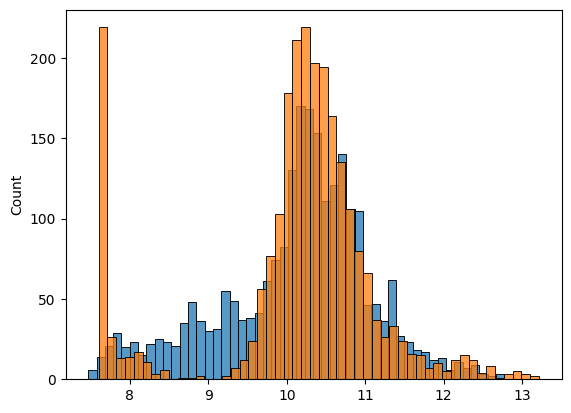

In [200]:
# Train
X_train = prepare_X(df_traing)
w0, w = train_linear_regression(X_train, y_train)

# Validation
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print(rmse(y_val, y_pred))

sns.histplot(y_pred, bins=50)
sns.histplot(y_val, bins=50)

# Categorical Variables: One-Hot encoding(not int dtypes that will modify the df to add their values as numeric)
by take the most populare values of them

In [ ]:
df_traing.dtypes
# take the most populare values of the column (make)
makes = list(df_traing.make.value_counts().head(5).index)
df_traing["make"]


def prepare_X(df):

    df = df.copy()

    df["age"] = 2017 - df.year
    # append the feature name to the features to take and train on them
    features = base + ["age"]

    # check the cars if the are from these popoulare values
    for c in makes:
        # create the col and fill the data
        df["make_%s" % c] = (df["make"] == c).astype("int")
        # include the new col feature with the traning
        features = features + ["make_%s" % c]
    
    df_num = df[features]

    df_num = df_num.fillna(0)
    X = df_num.to_numpy()
    return X

# Train
X_train = prepare_X(df_traing)
w0, w = train_linear_regression(X_train, y_train)

# Validation
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print(rmse(y_val, y_pred))

0.509096331019153


In [202]:
# ex.
data = numpy.array([[4, 4, 4], [3, 5, 5], [5, 1, 2]])
dataWithNose = numpy.array(
    [[4, 4, 4], [3, 5, 5], [5, 1, 1.0001]]
)
y = [1, 2, 3]

print(data, "\n\n", dataWithNose, "\n")

DTD = data.T.dot(data)
print("DTD \n", DTD)
# not have an inverse
print(numpy.linalg.inv(DTD).dot(data.T).dot(y))

DNTDN = dataWithNose.T.dot(dataWithNose)
print("DNTDN \n", DNTDN)
print("numpy.linalg.inv(DNTDN):\n",numpy.linalg.inv(dataWithNose),'\n')
print(numpy.linalg.inv(DNTDN).dot(dataWithNose.T).dot(y))

[[4 4 4]
 [3 5 5]
 [5 1 2]] 

 [[4.     4.     4.    ]
 [3.     5.     5.    ]
 [5.     1.     1.0001]] 

DTD 
 [[50 36 41]
 [36 42 43]
 [41 43 45]]
[-0.375 -3.625  4.25 ]
DNTDN 
 [[50.         36.         36.0005    ]
 [36.         42.         42.0001    ]
 [36.0005     42.0001     42.00020001]]
numpy.linalg.inv(DNTDN):
 [[ 6.25000000e-01 -5.00000000e-01 -3.63797881e-13]
 [ 2.74996250e+04 -1.99995000e+04 -1.00000000e+04]
 [-2.75000000e+04  2.00000000e+04  1.00000000e+04]] 

[-3.75008515e-01 -4.24995805e+04  4.25002055e+04]


# Regularization (Ridge Regression)
adding a factor to the diagonals of Gram Matrix

In [205]:
# ex.
Xe = numpy.array([[4, 4, 4], [3, 5, 5], [5, 1, 1.0001]])

XTXe = Xe.T.dot(Xe)
print(XTXe)
print(numpy.linalg.inv(XTXe))
# the problem in the inverse process ,so we handle the data and send it to inverse
XTXe = XTXe + 0.01 * numpy.eye(3)
print(XTXe)
numpy.linalg.inv(XTXe)

[[50.         36.         36.0005    ]
 [36.         42.         42.0001    ]
 [36.0005     42.0001     42.00020001]]
[[ 6.40627845e-01  2.71871471e+04 -2.71876315e+04]
 [ 2.71871471e+04  1.25621545e+09 -1.25623576e+09]
 [-2.71876315e+04 -1.25623576e+09  1.25625608e+09]]
[[50.01       36.         36.0005    ]
 [36.         42.01       42.0001    ]
 [36.0005     42.0001     42.01020001]]


array([[ 5.22025113e-02, -2.12885909e-02, -2.34512942e-02],
       [-2.12885909e-02,  5.00147279e+01, -4.99844603e+01],
       [-2.34512942e-02, -4.99844603e+01,  5.00163434e+01]])

In [ ]:
def train_linear_regression_reg(X, y, r=0.001):

    ones = numpy.ones(X.shape[0])
    X = numpy.column_stack([ones, X])
    # print(X)

    # GRAM MATRIX (x.T (transpose: switch columns to rows))
    XTX = X.T.dot(X)
    # print('\n',X.T)
    # Inverse GRAM MATRIX: (XT.X)-1

    XTX = XTX + r * numpy.eye(XTX.shape[0])
    XTX_inv = numpy.linalg.inv(XTX)

    # print("XTX.dot(XTX_inv): \n", XTX.dot(XTX_inv).round())
    w_full = XTX_inv.dot(X.T).dot(y)

    w0 = w_full[0]
    w = w_full[1:]
    return w0, w


# Train
X_train = prepare_X(df_traing)
w0, w = train_linear_regression_reg(X_train, y_train, 0.01)

# Validation
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print(rmse(y_val, y_pred))

0.5091001303035438


In [216]:
# find the best r value that improve the model
for r in [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    X_train = prepare_X(df_traing)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
 
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
 
    score = rmse(y_val, y_pred)
     
    print("reg parameter: ",r, "bias term: ",w0, "rmse: ",score)
 

reg parameter:  0.0 bias term:  9.31472057279352 rmse:  0.509096331019153
reg parameter:  1e-05 bias term:  9.31471984529014 rmse:  0.5090963348108922
reg parameter:  0.0001 bias term:  9.314713297770824 rmse:  0.5090963689372102
reg parameter:  0.001 bias term:  9.314647823084494 rmse:  0.5090967102676937
reg parameter:  0.01 bias term:  9.31399312761167 rmse:  0.5091001303035438
reg parameter:  0.1 bias term:  9.307451307409115 rmse:  0.5091350026178657
reg parameter:  1 bias term:  9.242542511188963 rmse:  0.5095497894720108
reg parameter:  10 bias term:  8.64064498120966 rmse:  0.5192630606106425
